<a href="https://colab.research.google.com/github/lygitdata/GarmentIQ/blob/main/test/landmark_detection_quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GarmentIQ Landmark Detection Quick Start

In [ ]:
!pip install garmentiq -q

In [ ]:
import garmentiq as giq
from garmentiq.landmark.detection.model_definition import PoseHighResolutionNet
from garmentiq.garment_classes import garment_classes

In [ ]:
# Download a vest dress image and a pretrained model
!mkdir -p test_image
!wget -q -O /content/test_image/cloth_3.jpg \
    https://raw.githubusercontent.com/lygitdata/GarmentIQ/refs/heads/gh-pages/asset/img/cloth_3.jpg

!mkdir -p models
!wget -q -O /content/models/hrnet.pth \
    https://huggingface.co/lygitdata/garmentiq/resolve/main/hrnet.pth

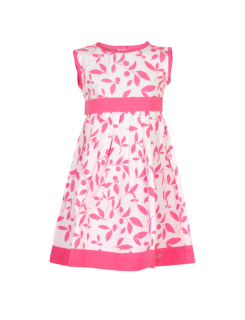

In [ ]:
# Plot the image
giq.landmark.plot(image_path="/content/test_image/cloth_3.jpg", figsize=(3, 3))

In [ ]:
# Load the pretrained model from Hugging Face
HRNet = giq.landmark.detection.load_model(
    model_path="/content/models/hrnet.pth",
    model_class=PoseHighResolutionNet()
)

In [ ]:
# Detect predefined landmarks
coords, maxvals, detection_dict = giq.landmark.detect(
    class_name="vest dress",
    class_dict=garment_classes,
    image_path="/content/test_image/cloth_3.jpg",
    model=HRNet,
    scale_std=200.0,
    resize_dim=[288, 384],
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225]
)

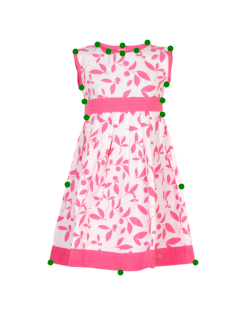

In [ ]:
# Plot the detected coordinates
giq.landmark.plot(image_path="/content/test_image/cloth_3.jpg", coordinate=coords, figsize=(3, 3), color="green")